Baseline MAE: 46.65
Baseline RMSE: 62.83
Advanced Model MAE: 0.67
Advanced Model RMSE: 2.24


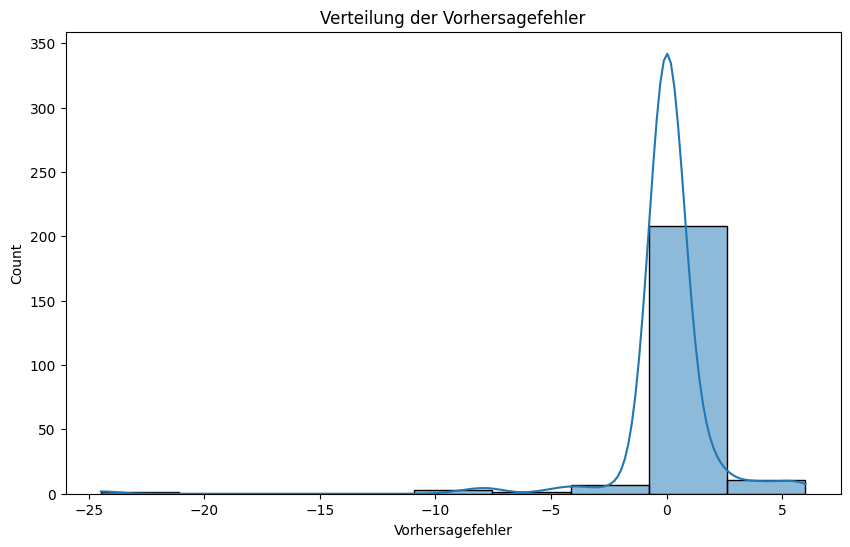

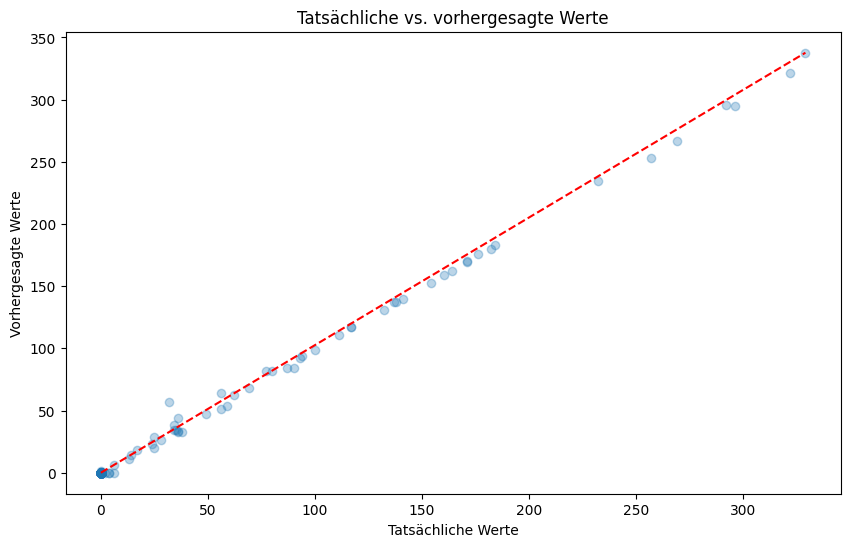

In [9]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Daten einlesen
data = pd.read_csv(r"C:\Users\Gast\Documents\Downloads\IU\Fallstudie_Modell_Engineering\project_folder\data\processed_data\preprocessed_data.csv")

# Feature- und Zielvariablen festlegen
features = [col for col in data.columns if col != 'sby_need']
X = data[features]
y = data['sby_need']

# Aufteilen der Daten in Trainings- und Testset (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline-Modell laden und bewerten
baseline_model = joblib.load(r"C:\Users\Gast\Documents\Downloads\IU\Fallstudie_Modell_Engineering\project_folder\models\baseline_model.pkl")
baseline_predictions = baseline_model.predict(X_test)  # Vorhersage auf dem Testset
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
rmse_baseline = mean_squared_error(y_test, baseline_predictions, squared=False)

print(f'Baseline MAE: {mae_baseline:.2f}')
print(f'Baseline RMSE: {rmse_baseline:.2f}')

# Fortgeschrittenes Modell laden und bewerten
precise_model = joblib.load(r"C:\Users\Gast\Documents\Downloads\IU\Fallstudie_Modell_Engineering\project_folder\models\precise_model.pkl")
precise_predictions = precise_model.predict(X_test)  # Vorhersage auf dem Testset
mae_precise = mean_absolute_error(y_test, precise_predictions)
rmse_precise = mean_squared_error(y_test, precise_predictions, squared=False)

print(f'Advanced Model MAE: {mae_precise:.2f}')
print(f'Advanced Model RMSE: {rmse_precise:.2f}')

# Fehlerverteilung visualisieren
errors = y_test - precise_predictions

plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel("Vorhersagefehler")
plt.title("Verteilung der Vorhersagefehler")
plt.show()

# Scatterplot der tatsächlichen vs. vorhergesagten Werte
plt.figure(figsize=(10, 6))
plt.scatter(y_test, precise_predictions, alpha=0.3)
plt.plot([0, max(y_test)], [0, max(precise_predictions)], color='red', linestyle='--')
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vorhergesagte Werte")
plt.title("Tatsächliche vs. vorhergesagte Werte")
plt.show()
